# Forelesning 12.10.2023: Datainnlasting og analyse

Vi skal utforske og analysere historiske aksjedata for Apple Inc (AAPL) ved bruk av Julia programmeringsspråket. 

Denne forelesning tar for seg:

* Datainnlasting
* Dataanalyse
* Data visualisering

## Nødvendige Pakker

Kjør denne koden for å installere pakkene som trengs for å kunne analysere dataen


In [1]:
#using Pkg
# Pkg.add("CSV")
# Pkg.add("DataFrames")

# Innebygde pakker vi skal bruke
# using Statistics
# using Dates

## Datafil

Datafilen heter `AAPL.csv`, og inneholder aksjekursen til Apple fra 2018 til 2023. Dataen er hentet fra Yahoo Finance.

Dere kan laste den ned ved å trykke på denne linken: 

<a href="AAPL.csv" download>Trykk her!</a>

## Laste inn data

Før du kan analysere data, må du ha den tilgjengelig i et format du kan arbeide med. 

Heldigvis har vi den i en fil som heter `AAPL.csv`. CSV står for Comma Separated Values, og er en vanlig måte å lagre data på.

Vi kan laste inn dataen ved å bruke `CSV` og `Dataframes` pakken. Man laster den ned ved å referere til filnavnet.

In [2]:
using CSV
using DataFrames

# Les inn data
#data = CSV.File("AAPL.csv") |> DataFrame # Alternativ måte å lese inn data på
data = CSV.read("AAPL.csv", DataFrame);

### Utforske dataen

Vi vil ofte begynne med å utforske dataen ved å se på de første radene. Dette gjør vi ved å bruke `first(data, n)` funksjonen. Hvor `data` er navnet på dataen, og `n` er antall rader vi vil se på.

In [3]:
first(data, 5) # Viser de første 5 radene i datasettet

Row,Date,Open,High,Low,Close,Adj Close,Volume
,Date,Float64,Float64,Float64,Float64,Float64,Int64
1,2018-10-04,57.695,58.0875,56.6825,56.9975,54.5884,128168000
2,2018-10-05,56.99,57.1025,55.145,56.0725,53.7025,134322000
3,2018-10-08,55.5525,56.2,55.05,55.9425,53.578,118655600
4,2018-10-09,55.91,56.8175,55.5625,56.7175,54.3203,107564000
5,2018-10-10,56.365,56.5875,54.0125,54.09,51.8038,167962400


*Hva er det feltene betyr?*

* Date: Datoen for børsdagen.
* Open: Åpningsprisen for AAPL-aksjen den dagen.
* High: Høyeste pris i løpet av dagen.
* Low: Laveste pris i løpet av dagen.
* Close: Sluttkursen.
* Adj Close: Justert sluttkurs, tar hensyn til ting som utbytte, splitt osv.
* Volume: Antall aksjer som ble omsatt den dagen.

Vi kan også se på de siste radene ved å bruke `last(data, n)` funksjonen.

In [4]:
last(data, 5) # Viser de siste 5 radene i datasettet

Row,Date,Open,High,Low,Close,Adj Close,Volume
,Date,Float64,Float64,Float64,Float64,Float64,Int64
1,2023-09-27,172.62,173.04,169.05,170.43,170.43,66921800
2,2023-09-28,169.34,172.03,167.62,170.69,170.69,56294400
3,2023-09-29,172.02,173.07,170.34,171.21,171.21,51814200
4,2023-10-02,171.22,174.3,170.93,173.75,173.75,52164500
5,2023-10-03,172.26,173.63,170.82,172.4,172.4,49594600


Vi kan også se grunnleggende statistikk om dataen ved å bruke `describe(data)` funksjonen.

In [5]:
describe(data) # Viser statistikk for datasettet

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,DataType
1,Date,,2018-10-04,2021-04-06,2023-10-03,0,Date
2,Open,116.347,35.995,129.2,196.24,0,Float64
3,High,117.719,36.43,130.9,198.23,0,Float64
4,Low,115.056,35.5,127.86,195.28,0,Float64
5,Close,116.443,35.5475,129.71,196.45,0,Float64
6,Adj Close,115.04,34.1638,127.975,196.185,0,Float64
7,Volume,1.07287e8,31458200,9.22768e7,426510000,0,Int64


## Indeksering i DataFrames

Når du jobber med DataFrames, er det viktig å forstå hvordan du kan indeksere eller "sikte deg inn" på spesifikke rader og kolonner. Det gir deg makt til å manipulere, analysere og forstå dine data på en effektiv måte.


### Indeksering av kolonner

Vi kan hente ut en kolonne ved å bruke `data[:, :kolonnenavn]` eller `data.kolonnenavn`. Å inkludere en `:` betyr at vi vil ha alle radene. Hadde vi skrevet `data[1:5, :kolonnenavn]` ville vi fått ut radene 1 til 5. Hadde vi skrevet bare `data[1, :kolonnenavn]` ville vi fått ut rad 1. Istedenfor å skrive kolonnenavn kan vi også bruke indeksen til kolonnen. F.eks. `data[:, 1]` for å få ut første kolonne.

Vi kan også hente ut flere kolonner ved å bruke `data[:, [:kolonnenavn1, :kolonnenavn2]]` eller `data[:, [1, 2]]` for å hente ut første og andre kolonne.

In [6]:
data[:, :Close] == data.Close # Henter ut kolonnen "Close" fra datasettet

true

In [7]:
data[1:5, :Close] # Henter ut de 5 første radene fra kolonnen "Close"

5-element Vector{Float64}:
 56.997501
 56.072498
 55.942501
 56.717499
 54.09

In [8]:
data.Close[1:5] # Henter ut de 5 første radene fra kolonnen "Close", men på en annen måte

5-element Vector{Float64}:
 56.997501
 56.072498
 55.942501
 56.717499
 54.09

In [9]:
data[1, :Close] # Henter ut verdien i rad 1, kolonne "Close"

56.997501

In [10]:
data[1, 5] # Henter ut verdien i rad 1, kolonne 5

56.997501

In [11]:
data[1, [1, 5]] # Henter ut verdien i rad 1, kolonne 1 og 5

Row,Date,Close
,Date,Float64
1,2018-10-04,56.9975


### Indeksering av rader

Vi kan hente ut en rad ved å bruke `data[radnummer, :]`. Å inkludere en `:` betyr at vi vil ha alle kolonnene. Hadde vi skrevet `data[radnummer, 1:5]` ville vi fått ut kolonnene 1 til 5. Hadde vi skrevet bare `data[radnummer, 1]` ville vi fått ut kolonne 1.

### Filterfunksjonen `filter`

Vi kan filtrere dataen ved å bruke `filter` funksjonen. Den tar inn en funksjon som argument, og returnerer alle radene som funksjonen returnerer `true` for. F.eks. `filter(x -> x > 5, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])` vil returnere `[6, 7, 8, 9, 10]`.

In [12]:
filter(row -> row[:Close] > 190, data) # Henter ut alle rader der verdien i kolonne "Close" er større enn 190

Row,Date,Open,High,Low,Close,Adj Close,Volume
,Date,Float64,Float64,Float64,Float64,Float64,Int64
1,2023-06-30,191.63,194.48,191.26,193.97,193.708,85069600
2,2023-07-03,193.78,193.88,191.76,192.46,192.2,31458200
3,2023-07-05,191.57,192.98,190.62,191.33,191.072,46920300
4,2023-07-06,189.84,192.02,189.2,191.81,191.551,45094300
5,2023-07-07,191.41,192.67,190.24,190.68,190.423,46778000
6,2023-07-13,190.5,191.19,189.78,190.54,190.283,41342300
7,2023-07-14,190.23,191.18,189.63,190.69,190.433,41573900
8,2023-07-17,191.9,194.32,191.81,193.99,193.728,50520200
9,2023-07-18,193.35,194.33,192.42,193.73,193.469,48353800


## Dataanalyse

Vi kan nå begynne å analysere dataen.

### Hva er den høyeste prisen AAPL-aksjen har hatt og når var det?

In [13]:
# Hva må jeg gjøre for å få en oversikt over hvilke kolonner som finnes i datasettet?
println(names(data))

["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]


In [14]:
# Hvilken funksjon kan jeg bruke for å finne maksimum og minimum for en kolonne?
println(maximum(data[!,:Close]))
println(minimum(data[!, :Close]))

196.449997
35.547501


In [15]:
println("Største AAPL pris: ", maximum(data[!, :Close]))
println("Dato for største AAPL pris: ", data[findmax(data[!, :Close])[2], :Date]) # findmax returnerer en tuple med største verdi og indeks til denne verdien

Største AAPL pris: 196.449997
Dato for største AAPL pris: 2023-07-31


### Hva betyr `!`?

Når du skriver `data[!, :Close]`, bruker du `!` for å signalisere at du ønsker en "view" av dataene, i stedet for en kopi. Dette betyr at ingen ny minneallokering skjer, og alle endringer du gjør på den returnerte kolonnen vil reflekteres i den opprinnelige DataFrame. Dette er nyttig for ytelsesårsaker.


Uten `!`

Hvis du hadde skrevet `data[:, :Close]` (merk fraværet av !), ville du fått en kopi av kolonnen. Endringer i denne kopien ville ikke ha noen effekt på den opprinnelige DataFrame.

Sammendrag

* `data[!, :Close]` : Returnerer en "view", ingen ny minneallokering, endringer reflekteres i originalen.
* `data[:, :Close]` : Returnerer en kopi, ny minneallokering, endringer har ingen effekt på originalen.

Bruk av `!` er derfor en måte å være mer effektiv på, spesielt når du jobber med store DataFrames, fordi det unngår unødvendig kopi og minneallokering.

### Eksempel: Lag en funksjon som finner gjennomsnittet for Close for et gitt tidsintervall

**Hvilken funksjon er nyttig for å finne gjennomsnittet av en liste med tall?**

Svar: `mean` - funksjonen er nyttig for å finne gjennomsnittet av en liste med tall. F.eks. `mean([1, 2, 3, 4, 5])` vil returnere `3.0`.

**Hvor finner vi `mean` funksjonen i Julia?**

Svar: `Statistics` pakken.

**Hvordan kan vi gjøre om string til Date format?**

Svar: `Date` funksjonen. Som finnes i `Dates` pakken.

In [16]:
using Statistics
using Dates

In [17]:
function calculate_average_close(data::DataFrame, start_date::String, end_date::String)

    start_date = Date(start_date, "yyyy-mm-dd") # Konverterer startdato til Date-format
    end_date = Date(end_date, "yyyy-mm-dd") # Konverterer sluttdato til Date-format
    # Filtrerer dataen basert på datointervallet
    filtered_data = filter(row -> start_date <= row[:Date] <= end_date, data) # <= betyr mindre enn eller lik, og her brukes det på datoer som er av typen Date 
    
    # Sjekker om det faktisk er data i det gitte intervallet
    if nrow(filtered_data) == 0
        return "Ingen data tilgjengelig for det spesifiserte datointervallet."
    end
    
    # Beregner gjennomsnittet av 'Close'-kolonnen
    average_close = mean(filtered_data[:, :Close])
    
    return average_close
end

calculate_average_close (generic function with 1 method)

In [18]:
calculate_average_close(data, "2019-01-01", "2019-12-31")

52.063988063492054

In [19]:
calculate_average_close(data, "2019-01-01", "2011-12-31") # Ugyldig datointervall

"Ingen data tilgjengelig for det spesifiserte datointervallet."

### Eksempel: Plot Close for AAPL

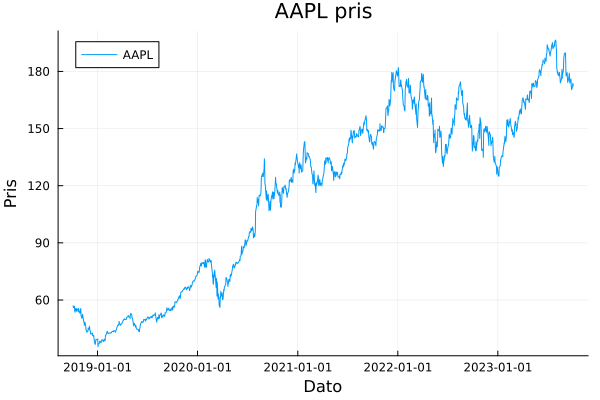

In [20]:
using Plots

plot(data.Date, data.Close, label="AAPL", xlabel="Dato", ylabel="Pris", title="AAPL pris", legend=:topleft)

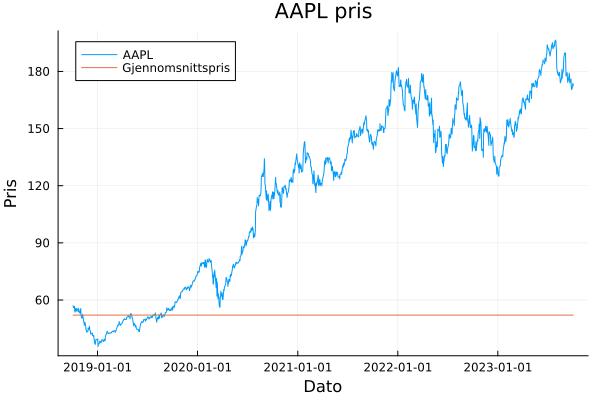

In [21]:
# Utvide plottet med gjennomsnittsprisen for 2019
plot!(data.Date, fill!(zeros(length(data.Date)), calculate_average_close(data, "2019-01-01", "2019-12-31")), label="Gjennomsnittspris")

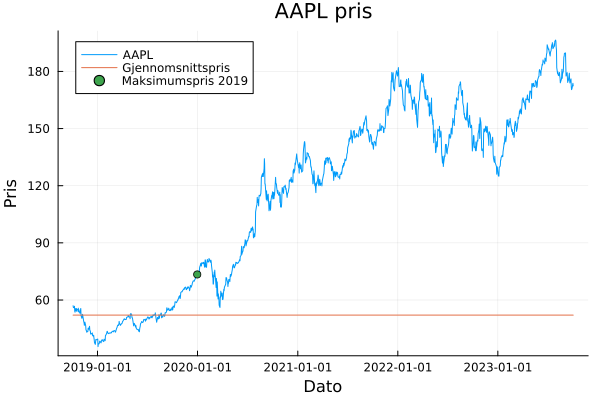

In [22]:
# Utvide plotet med punkter for maksimumprisene for hvert år

# Funksjon som finner maksimumsprisen for et gitt år
function find_max_price_for_year(data::DataFrame, year::Int64)
    # Filtrerer dataen basert på år
    filtered_data = filter(row -> Dates.year(row[:Date]) == year, data)
    
    # Sjekker om det faktisk er data i det gitte intervallet
    if nrow(filtered_data) == 0
        return "Ingen data tilgjengelig for det spesifiserte datointervallet."
    end
    
    # Returnerer maksimumsprisen for det gitte året
    return maximum(filtered_data[!, :Close])
end

# Plotte maksimumprisen for 2019 som et punkt
scatter!([Date("2019-12-31")], [find_max_price_for_year(data, 2019)], label="Maksimumspris 2019")

#### Avansert Plotting

In [23]:
# Initiere en animasjon
anim = @animate for i in 1:20:length(data[!, :Close])
    plot(data[1:i, :Date], data[1:i, :Close], label="Close Price", linewidth=2)
    title!("AAPL Close Price Over Time")
    xlabel!("Date")
    ylabel!("Close Price")
    ylims!(minimum(data[!, :Close]) * 0.9, maximum(data[!, :Close]) * 1.1)
end

# Lagre som en GIF
gif(anim, "aapl_close_price.gif", fps=24);

[ Info: Saved animation to C:\Users\amira\Documents\NMBU\INF100\3_praktiske_anvendelser\aapl_close_price.gif


<img src="aapl_close_price.gif" alt="Animated plot of AAPL Close Prices" width="600"/>


### Eksempel: Hvis du hadde investert $1000 i AAPL i starten av dette datasettet, hvor mye ville du hatt nå?

In [24]:
start_investering = 1000;

første_close_pris = data.Close[1]
siste_close_pris = data.Close[end]

endelig_verdi = (siste_close_pris / første_close_pris) * start_investering
println("Verdien av din investering nå: $endelig_verdi")


Verdien av din investering nå: 3024.693907194282


## Bonus: Enkel Maskinlæring (Statistikk)

In [25]:
using Random
Random.seed!(42); # Setter seed for å få samme tilfeldige tall hver gang

In [26]:
# using Pkg
# Pkg.add("GLM") # Installerer pakken GLM som vi skal bruke til å lage lineær regresjon modell 
using GLM

In [27]:
n = size(data, 1)
train_indices = randsubseq(1:n, 0.8)
test_indices = setdiff(1:n, train_indices)

train_data = data[train_indices, :]; 
test_data = data[test_indices, :];

# Vi deler opp dataen i treningsdata og testdata basert på indeksene vi har laget over fordi vi ønsker å bruke 80% av dataen til trening og 20% til testing av modellen vår

In [28]:
model = lm(@formula(Close ~ Open + High + Low), train_data) # Lager en lineær regresjonsmodell med variablene Open, High og Low som prediktorer og Close som responsvariabel

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Close ~ 1 + Open + High + Low

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)   0.0422468   0.0711664    0.59    0.5529  -0.0974043   0.181898
Open         -0.679558    0.0257357  -26.41    <1e-99  -0.730059   -0.629056
High          0.858801    0.0236361   36.33    <1e-99   0.812419    0.905182
Low           0.820187    0.0220567   37.19    <1e-99   0.776905    0.86347
────────────────────────────────────────────────────────────────────────────

In [29]:
predicted = predict(model, test_data)
actual = test_data[:, :Close]
error = sqrt(mean((predicted .- actual).^2))

0.8894883300851502

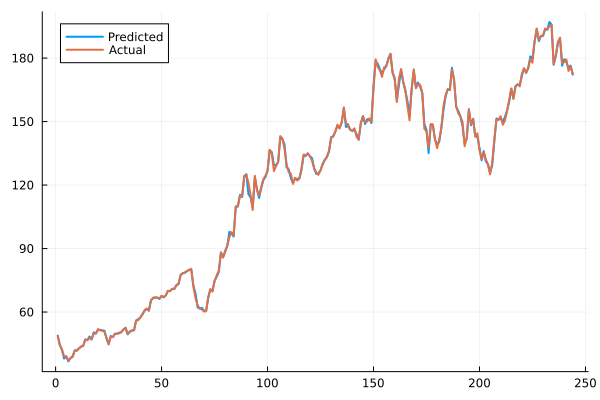

In [30]:
using Plots

plot(1:length(predicted), [predicted, actual], label=["Predicted" "Actual"], lw=2)
